In [1]:
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import csv
import zipfile
import sklearn.metrics as sm

In [4]:
import os

In [5]:
print (os.getcwd())

C:\Users\Acer\Desktop\my bincom projects


In [6]:
path = r'C:/Users/Acer/Documents/'
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'energy_data_complete.csv',
 'fibonacci.ipynb',
 'python for data analysis.ipynb',
 'regression.ipynb',
 'supervised learningflowerrecognition.ipynb',
 'textfile.ipynb',
 'todolistrealone.ipynb',
 'Untitled.ipynb']

In [7]:
df = pd.read_csv('energy_data_complete.csv')

In [8]:
df.shape

(19735, 29)

In [9]:
df.columns = [x.lower()for x in df.columns]
df.head()
df.head(5)

,date,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [10]:
df.isnull().sum().sort_values(ascending=False)

date           0
t7             0
rv1            0
tdewpoint      0
visibility     0
windspeed      0
rh_out         0
press_mm_hg    0
t_out          0
rh_9           0
t9             0
rh_8           0
t8             0
rh_7           0
rh_6           0
appliances     0
t6             0
rh_5           0
t5             0
rh_4           0
t4             0
rh_3           0
t3             0
rh_2           0
t2             0
rh_1           0
t1             0
lights         0
rv2            0
dtype: int64

In [11]:
df.apply(lambda x:len(x.unique()))

date           19735
appliances        92
lights             8
t1               722
rh_1            2547
t2              1650
rh_2            3376
t3              1426
rh_3            2618
t4              1390
rh_4            2987
t5              2263
rh_5            7571
t6              4446
rh_6            9709
t7              1955
rh_7            5891
t8              2228
rh_8            6649
t9               924
rh_9            3388
t_out           1730
press_mm_hg     2189
rh_out           566
windspeed        189
visibility       413
tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

In [12]:
df.describe()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   t1           19735 non-null  float64
 4   rh_1         19735 non-null  float64
 5   t2           19735 non-null  float64
 6   rh_2         19735 non-null  float64
 7   t3           19735 non-null  float64
 8   rh_3         19735 non-null  float64
 9   t4           19735 non-null  float64
 10  rh_4         19735 non-null  float64
 11  t5           19735 non-null  float64
 12  rh_5         19735 non-null  float64
 13  t6           19735 non-null  float64
 14  rh_6         19735 non-null  float64
 15  t7           19735 non-null  float64
 16  rh_7         19735 non-null  float64
 17  t8           19735 non-null  float64
 18  rh_8         19735 non-null  float64
 19  t9  

C:\Users\Acer\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='appliances', ylabel='Density'>

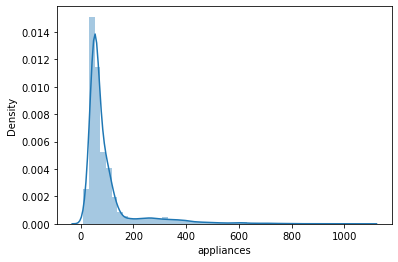

In [14]:
sns.distplot(df["appliances"])

In [15]:

import time
import dateutil

In [16]:
df_new = df.drop(columns=['lights','date'])
df_new.head()

,appliances,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_new_normalised = pd.DataFrame(scaler.fit_transform(df_new),columns=df_new.columns)

In [18]:
df_new_normalised.head()

,appliances,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [19]:
df_features = df_new_normalised.drop(columns = ['appliances'])
appliances_target = df_new_normalised['appliances']
df_features.head()

,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [20]:
appliances_target.head()

0    0.046729
1    0.046729
2    0.037383
3    0.037383
4    0.046729
Name: appliances, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_features,appliances_target,test_size=0.3,random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
predicted_values = linear_model.predict(x_test)

In [30]:
from sklearn import metrics 
print('Mean Absolute Error (MAE)',metrics.mean_absolute_error(y_test,predicted_values))
print('Mean Square Error (MSE)',metrics.mean_squared_error(y_test,predicted_values))
print('Root Mean Square Error (RMSE)',np.sqrt(metrics.mean_squared_error(y_test,predicted_values)))
print('R2 score',metrics.r2_score(y_test,predicted_values))

Mean Absolute Error (MAE) 0.05013362397742957
Mean Square Error (MSE) 0.007658778867195367
Root Mean Square Error (RMSE) 0.0875144494766171
R2 score 0.14890246319303535


In [31]:
from sklearn.metrics import r2_score
R_square = r2_score(y_test,predicted_values)
print ('Coefficient of Determination',R_square)

Coefficient of Determination 0.14890246319303535


In [29]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train,y_train)
pred2 = ridge_reg.predict(x_test)
print('Root Mean  Square Error (RMSE)',np.sqrt(metrics.mean_squared_error(y_test,pred2)))
print('R2 score',metrics.r2_score(y_test,pred2))

Root Mean  Square Error (RMSE) 0.08753385704628004
R2 score 0.1485249354509256


In [25]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train,y_train)
pred3 = lasso_reg.predict(x_test)
print('Root Mean Square Error (RMSE)',np.sqrt(metrics.mean_squared_error(y_test,pred3)))
print('R2 score',metrics.r2_score(y_test,pred3))

Root Mean Square Error (RMSE) 0.09358170467245137
R2 score 0.026800880567125818


<function matplotlib.pyplot.show(close=None, block=None)>

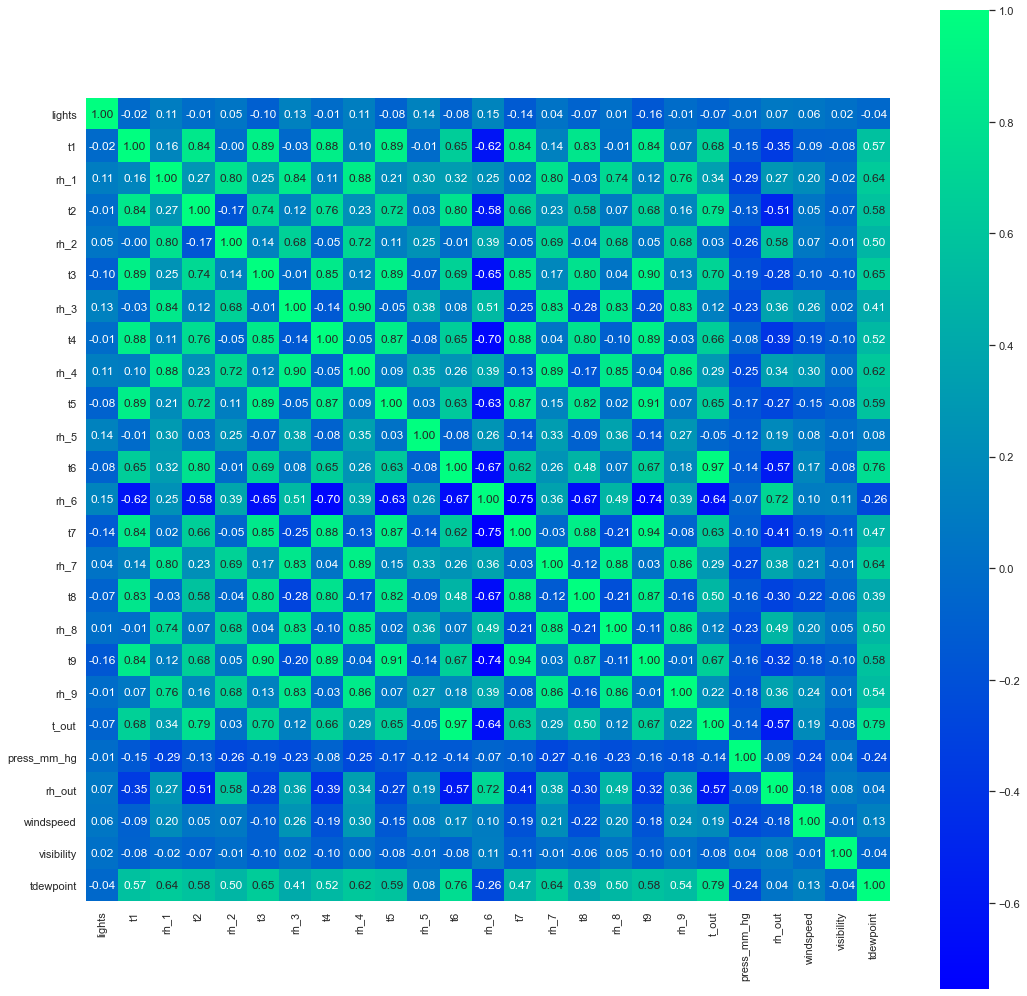

In [26]:
col = ['lights','t1','rh_1','t2','rh_2','t3','rh_3','t4','rh_4','t5','rh_5','t6','rh_6','t7','rh_7','t8','rh_8','t9','rh_9','t_out','press_mm_hg','rh_out','windspeed','visibility','tdewpoint']
corr = df[col].corr()
plt.figure(figsize=(18,18))
sns.set(font_scale=1)
sns.heatmap(corr,cbar=True,annot=True,square=True,cmap="winter",fmt='.2f',xticklabels=col,yticklabels=col)
plt.show

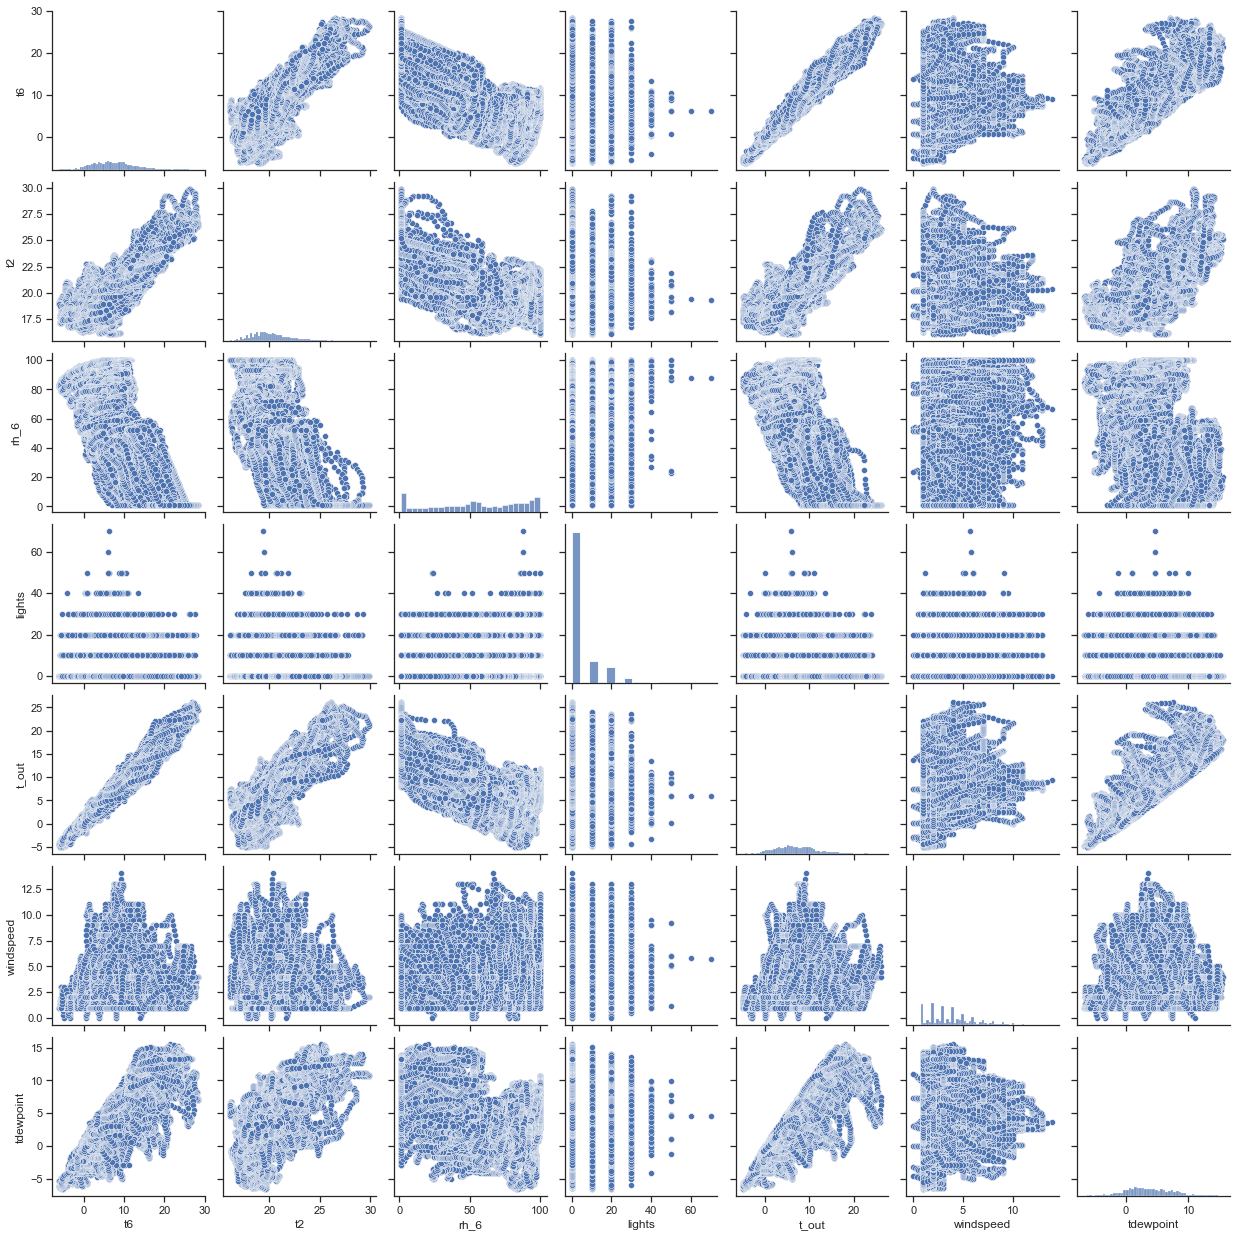

In [27]:
col = ['t6','t2','rh_6','lights','t_out','windspeed','tdewpoint']
sns.set(style="ticks",color_codes=True)
sns.pairplot(df[col])
plt.show();

In [28]:
df['date']=df['date'].apply(lambda x:datetime.strptime(x,%d/%m/%y))
df["hours"]=(df['date'].str.split(':').str[0].str.split(" ").str[1]).astype(str).astype(int)
df["hour_avg"]=list(map(dict(df.groupby('hours')["appliances"].mean()).get,df.hours))

SyntaxError: invalid syntax (<ipython-input-28-d94b4a6d4ad6>, line 1)